## Benchmarking a simple torch program with different numbers of threads


In [1]:
import torch

In [2]:
import platform
import psutil
print(platform.platform())
print("Physical cores:", psutil.cpu_count(logical=False))
print("Total cores:", psutil.cpu_count(logical=True))

Darwin-19.4.0-x86_64-i386-64bit
Physical cores: 6
Total cores: 12


In [3]:
print(torch.__config__.parallel_info())

ATen/Parallel:
	at::get_num_threads() : 1
	at::get_num_interop_threads() : 6
OpenMP not found
Intel(R) Math Kernel Library Version 2019.0.5 Product Build 20190808 for Intel(R) 64 architecture applications
	mkl_get_max_threads() : 6
Intel(R) MKL-DNN v0.21.1 (Git Hash 7d2fd500bc78936d1d648ca713b901012f470dbc)
std::thread::hardware_concurrency() : 12
Environment variables:
	OMP_NUM_THREADS : [not set]
	MKL_NUM_THREADS : [not set]
ATen parallel backend: OpenMP



In [4]:
# taken from https://pytorch.org/docs/master/notes/cpu_threading_torchscript_inference.html
import timeit

runtimes = []
cpu_percent = []
threads = [1] + [t for t in range(2, 49, 2)]

for t in threads:
    torch.set_num_threads(t)
    r = timeit.timeit(setup = "import torch; x = torch.randn(1024, 1024); y = torch.randn(1024, 1024)", stmt="torch.mm(x, y)", number=100)
    cpu_percent.append(psutil.cpu_percent())
    runtimes.append(r)

In [5]:
print(torch.__config__.parallel_info())

ATen/Parallel:
	at::get_num_threads() : 1
	at::get_num_interop_threads() : 6
OpenMP not found
Intel(R) Math Kernel Library Version 2019.0.5 Product Build 20190808 for Intel(R) 64 architecture applications
	mkl_get_max_threads() : 48
Intel(R) MKL-DNN v0.21.1 (Git Hash 7d2fd500bc78936d1d648ca713b901012f470dbc)
std::thread::hardware_concurrency() : 12
Environment variables:
	OMP_NUM_THREADS : [not set]
	MKL_NUM_THREADS : [not set]
ATen parallel backend: OpenMP



In [6]:
import matplotlib.pyplot as plt

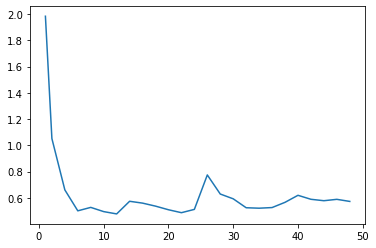

In [7]:
plt.plot(threads, runtimes)

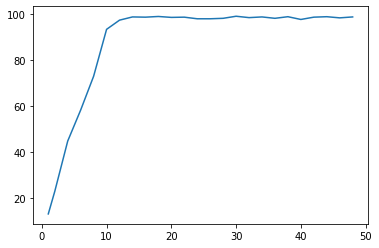

In [8]:
plt.plot(threads, cpu_percent)

In [9]:
runtimes

[1.9825893449997238,
 1.051717116999498,
 0.661090425997827,
 0.5017941940022865,
 0.5279581410031824,
 0.4958250570016389,
 0.4782809179996548,
 0.5744492349986103,
 0.5604153029998997,
 0.537549176999164,
 0.5100198250001995,
 0.48760966999907396,
 0.5126808009990782,
 0.774807249999867,
 0.6296413320014835,
 0.5931718889987678,
 0.5253068279998843,
 0.5217847560015798,
 0.5266534479997063,
 0.5664614460001758,
 0.6199372859991854,
 0.5896043100001407,
 0.5787620699993568,
 0.5892493930005003,
 0.5733306889997039]

In [10]:
threads

[1,
 2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 20,
 22,
 24,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 40,
 42,
 44,
 46,
 48]

In [11]:
cpu_percent

[13.2,
 23.0,
 44.9,
 58.4,
 73.1,
 93.5,
 97.5,
 98.9,
 98.8,
 99.1,
 98.7,
 98.8,
 98.1,
 98.1,
 98.3,
 99.2,
 98.6,
 98.9,
 98.3,
 99.0,
 97.8,
 98.8,
 99.0,
 98.5,
 98.9]